In [24]:
import pandas as pd
import numpy as np
store = pd.read_csv('inputs/store.csv')
train = pd.read_csv('inputs/train.csv')
test = pd.read_csv('inputs/test.csv')

In [25]:
print "Lets look at training set-"
print train.head(6)
print "Lets look at stores data-" 
print train.head(6)
print "Given number of rows for training =", train.shape[0]
print "Given number of rows for testing =", test.shape[0]

Lets look at training set-
   Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0    150          5  2015-03-06   9105        892     1      1            0   
1    321          2  2013-07-30   8678        728     1      1            0   
2   1081          6  2013-06-29      0          0     0      0            0   
3    536          1  2013-12-23  18854       1813     1      0            0   
4    267          1  2013-05-20      0          0     0      0            a   
5    425          4  2013-10-24   2908        413     1      1            0   

   SchoolHoliday  
0              0  
1              1  
2              0  
3              1  
4              0  
5              1  
Lets look at stores data-
   Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0    150          5  2015-03-06   9105        892     1      1            0   
1    321          2  2013-07-30   8678        728     1      1            0   
2   1081          6  20

In [26]:
sf = pd.merge(train, store, on='Store') #merge data for analysis
print "List of columns -", sf.columns
sf['Open'] = sf['Open'].apply(lambda x: 0 if np.isnan(x) else x) #get rid of NaN values if store is 'closed'

List of columns - Index([u'Store', u'DayOfWeek', u'Date', u'Sales', u'Customers', u'Open',
       u'Promo', u'StateHoliday', u'SchoolHoliday', u'StoreType',
       u'Assortment', u'CompetitionDistance', u'CompetitionOpenSinceMonth',
       u'CompetitionOpenSinceYear', u'Promo2', u'Promo2SinceWeek',
       u'Promo2SinceYear', u'PromoInterval'],
      dtype='object')


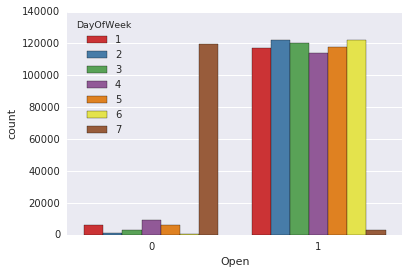

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#lets see the frequency days when stores were open and closed
ax = sns.countplot(x='Open', hue='DayOfWeek', data=sf, palette='Set1')

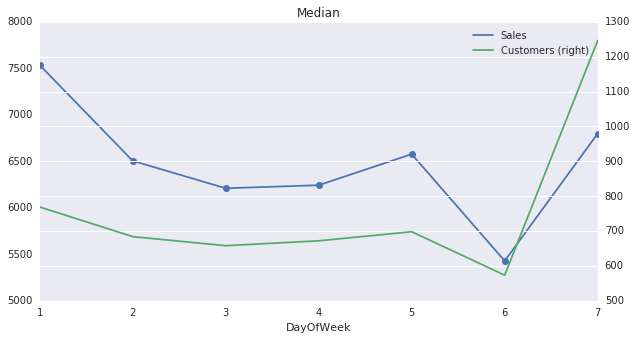

In [28]:
#a better way to get more details, timeline view of medians of each day of the week-
day = sf[(sf['Open']!=0)]
sales_day = day.groupby('DayOfWeek')['Sales'].median()
cust_day = day.groupby('DayOfWeek')['Customers'].median()
#
fig, (axis1) = plt.subplots(1,1, sharex=True, figsize=(10,5))
# plot median sales
ax1 = sales_day.plot(legend=True, ax=axis1, marker='o',title="Median")
ax1.set_xticks(sales_day.index)
tmp = ax1.set_xticklabels(sales_day.index.tolist(), rotation=90)
# overlay customer data
cust_day.plot(legend=True, ax=axis1, marker='x', secondary_y=True)

In [29]:
#for more insights lets split Year-Month-Date to three different columns
def date_change(data):
    data['Month'] = data['Date'].apply(lambda x : int(str(x)[5:7]))
    data['Year'] = data['Date'].apply(lambda x : int(str(x)[:4]))
    data['MonthYear'] = data['Date'].apply(lambda x : (str(x)[:7]))
    data['date_int'] = data['Date'].apply(lambda x : (str(x)[8:10]))
    data = data.drop('Date', axis=1)
    return data
sf = date_change(sf)
test = date_change(test)

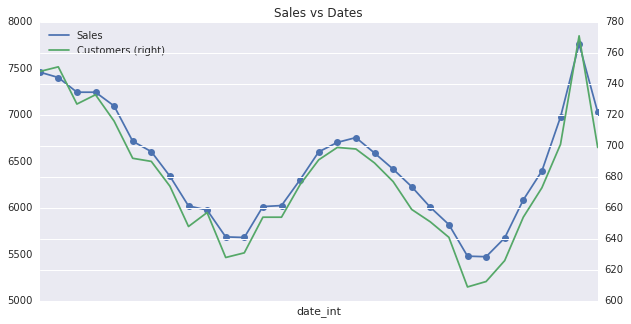

In [30]:
day = sf[(sf['Open']!=0)]
sales_day = day.groupby('date_int')['Sales'].median()
cust_day = day.groupby('date_int')['Customers'].median()
#
fig, (axis1) = plt.subplots(1,1, sharex=True, figsize=(10,5))
# plot median sales
ax1 = sales_day.plot(legend=True, ax=axis1, marker='o',title="Sales vs Dates")
ax1.set_xticks(sales_day.index)
tmp = ax1.set_xticklabels(sales_day.index.tolist(), rotation=90)
# overlay customer data
cust_day.plot(legend=True, ax=axis1, marker='x', secondary_y=True)

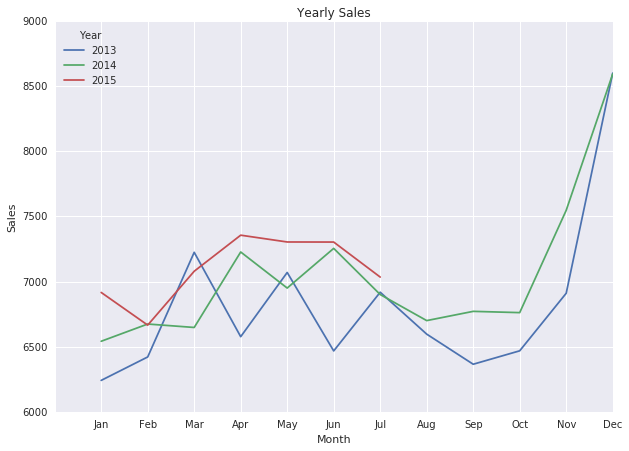

In [31]:
import calendar
# select all stores that were open
subs = sf[sf['Open']!=0]
# groupby Year and Month
selected_sales = subs.groupby(['Year', 'Month'])['Sales'].mean()
selected_cust = subs.groupby(['Year', 'Month'])['Customers'].mean()
# plot
fig, (axis1) = plt.subplots(1,1, figsize=(10,7))
selected_sales.unstack().T.plot(ax=axis1)
tmp = axis1.set_title("Yearly Sales")
tmp = axis1.set_ylabel("Sales")
tmp = axis1.set_xticks(range(0,13))
tmp = axis1.set_xticklabels(calendar.month_abbr)

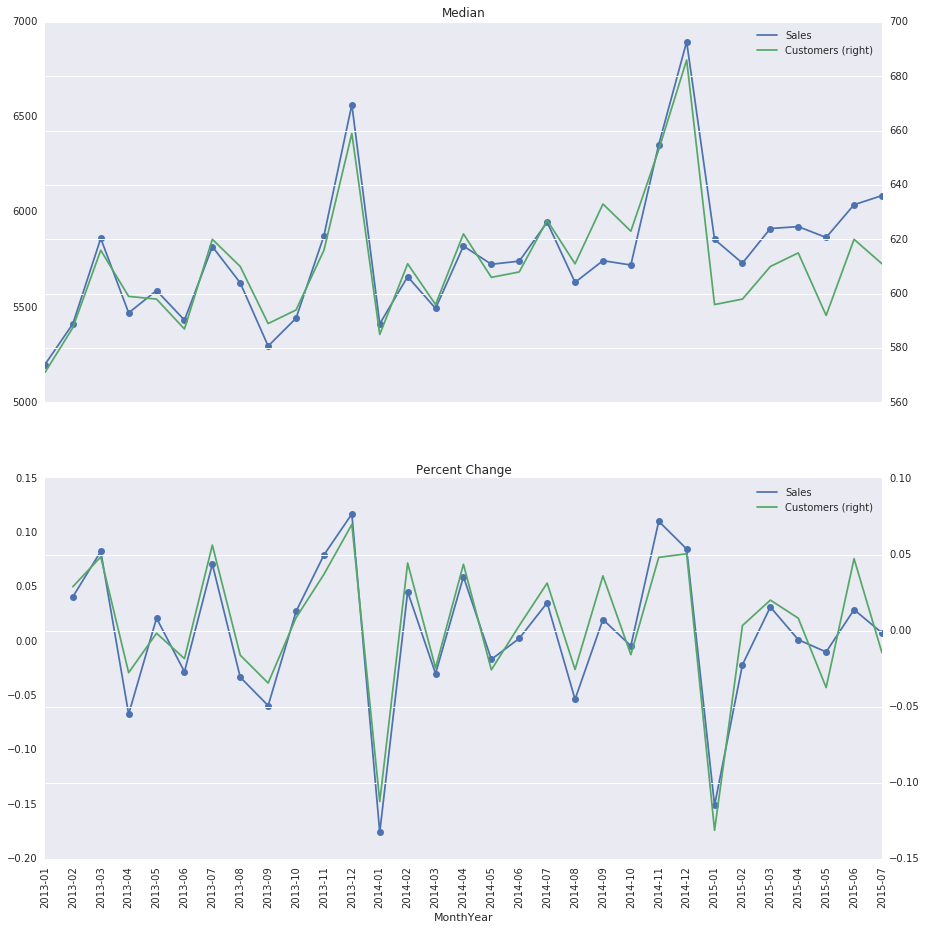

In [32]:
# median sales
median_sales = sf.groupby('MonthYear')['Sales'].median()
pct_median_change = sf.groupby('MonthYear')['Sales'].median().pct_change()
# median customers
median_cust = sf.groupby('MonthYear')['Customers'].median()
pct_median_custchange = sf.groupby('MonthYear')['Customers'].median().pct_change()
fig, (axis1, axis2) = plt.subplots(2, 1, sharex=True, figsize=(15,15))
# plot median sales
ax1 = median_sales.plot(legend=True, ax=axis1, marker='o',title="Median")
ax1.set_xticks(range(len(median_sales)))
ax1.set_xticklabels(median_sales.index.tolist(), rotation=90)
#pd.rolling_mean(median_sales, window=7).plot(ax=axis1)
# plot pct change
ax2 = pct_median_change.plot(legend=True, ax=axis2, marker='o',rot=90, title="Percent Change")
# overlay customer data
median_cust.plot(legend=True, ax=axis1, marker='x', secondary_y=True)
pct_median_custchange.plot(legend=True, ax=axis2, marker='x', rot=90, secondary_y=True)

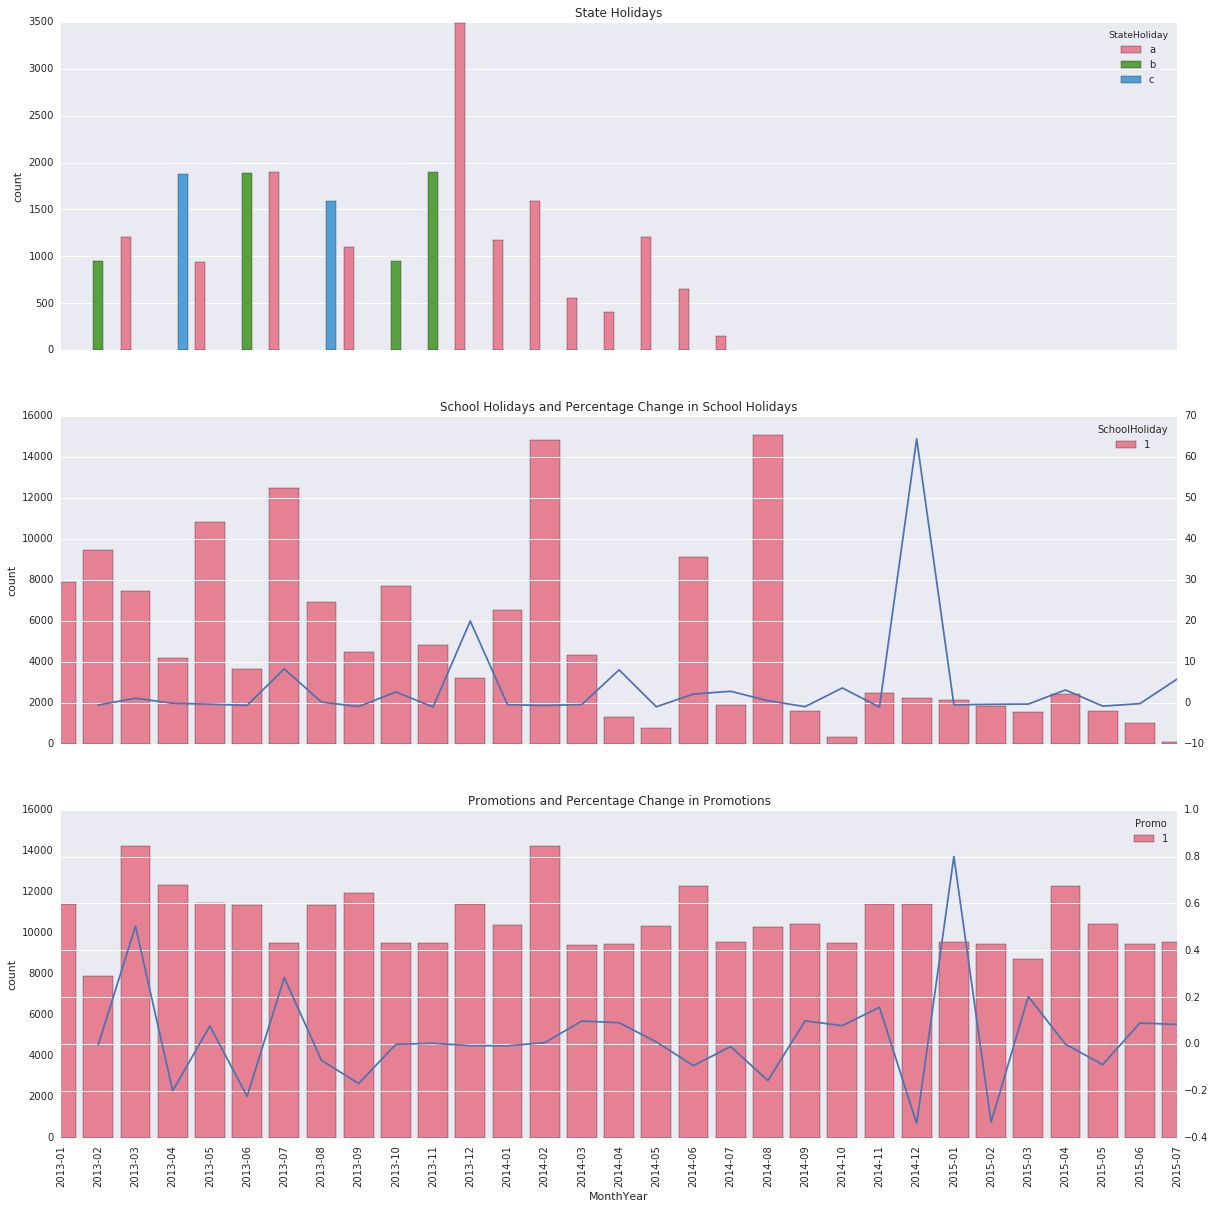

In [33]:
fig, (axis3, axis4, axis5) = plt.subplots(3, 1, sharex=True, figsize=(20,20))
# stateholiday overlay
# StateHoliday has a mixture of "O", 0 and "0", replace these with "O"
sf.StateHoliday.replace(["O",0,"0"],['O','O','O'], inplace=True)
ax3 = sns.countplot(x='MonthYear', hue='StateHoliday', data=sf[sf['StateHoliday']!='O'], palette='husl', ax=axis3)
tmp = ax3.set_xticklabels(ax3.get_xticklabels(), rotation=90)
tmp = ax3.set_title('State Holidays')
#schoolholiday overlay
ax4 = sns.countplot(x='MonthYear', hue='SchoolHoliday', data=sf[sf['SchoolHoliday']!=0], palette='husl', ax=axis4)
subs = sf[sf['SchoolHoliday']!=0]
cntchange = subs.groupby('MonthYear')['SchoolHoliday'].count().pct_change()
cntchange.plot(ax=axis4, marker='x', secondary_y=True)
tmp = ax4.set_xticklabels(ax4.get_xticklabels(), rotation=90)
tmp = ax4.set_title('School Holidays and Percentage Change in School Holidays')
#promotions overlay
ax5 = sns.countplot(x='MonthYear', hue='Promo', data=sf[sf["Promo"]!=0], palette='husl', ax=axis5)
subs = sf[sf['Promo']!=0]
cntchange = subs.groupby('MonthYear')['Promo'].count().pct_change()
cntchange.plot(ax=axis5, marker='x', secondary_y=True)
tmp = ax5.set_xticklabels(ax5.get_xticklabels(), rotation=90)
tmp = ax5.set_title('Promotions and Percentage Change in Promotions')